## Homework 1
From Chapter 3, found on page 129 of ISLP

*This question involves the use of simple linear regression on the Auto data set*

In [100]:
# Import standard libraries
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots 
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Import specific objects
from textwrap import wrap # to avoiding label overlapping in plots
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

# Load dataset
Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


_a)_	Use the `sm.OLS()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the `model.summary()` function to print the results. Comment on the output

(i) Is there a relationship between the predictor and the response?
- Yes. p_values are less than 0.05.

(ii) How strong is the relationship between the predictor and the response?
- An R-squared value of 0.606 indicates a moderately strong relationship between horsepower and mpg, suggesting that about 60.6% of the variability in mpg can be explained by horsepower.

(iii) Is the relationship between the predictor and the response positive or negative?
- The coefficient of the predictor variable (horsepower) is negative (-0.1578). This indicates a negative relationship between horsepower and mpg.

(iv) What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?
- The mean prediction with a horsepower of 98 is 24.467077. 
- The 95% confidence interval is [23.973079, 24.961075].
- The 95% prediction interval is [14.809396, 34.124758].

In [101]:
import tensorflow as tf

# Check if eager execution is enabled
is_eager = tf.executing_eagerly()

print("Eager execution:", is_eager)

Eager execution: True


In [163]:
#Add your code here

# df=pd.DataFrame(Auto)
# # Prepare the data
# X = df['horsepower']  # Predictor variable
# X = sm.add_constant(X)  # Add a constant term for the intercept
# y = df['mpg']  # Response variable

X = Auto['horsepower']
X_with_const = sm.add_constant(X) 
y = Auto['mpg']

# Fit the regression model
model = sm.OLS(y, X_with_const)
results = model.fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 31 May 2024   Prob (F-statistic):           7.03e-81
Time:                        14:54:50   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

In [115]:
# Predict y when x=98 -- Method 1
# y= intercept + slope * X
slope_estimate =  results.params['horsepower']
intercept_estimate = results.params['const']
X_pred = 98
y_pred = intercept_estimate + slope_estimate * X_pred
y_pred

24.46707715251243

In [126]:
# Predict y when x=98 -- Method 2
# results.predict(), not model.predict()
horsepower = 98
# add constant term
X_pred = np.array([1, horsepower])
y_pred = results.predict(sm.add_constant(X_pred))
y_pred[1]

24.46707715251243

In [116]:
# Predict y when x=98 -- Method 3
# get_prediction(X_pred).summary_frame(alpha=0.05) 
horsepower = 98
X_pred = np.array([1, horsepower])
results.get_prediction(X_pred).summary_frame(alpha=0.05) 

# observation interval
# In simpler terms, if we were to repeat the experiment of measuring MPG for vehicles with a horsepower of 98 
# many times, about 95% of the time, the true MPG for a new vehicle would be within the range of approximately 
# 14.81 to 34.12 MPG.

# This interval takes into account both the uncertainty in the regression coefficients 
# (represented by the confidence interval) and the inherent variability in individual observations 
# around the regression line.

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


_b)_	Plot the response and the predictor in a new set of axes `ax` using `scatter`. Use the `ax.plot()` function with the predictor and the model prediction as defined in the lab to display the least squares regression line.

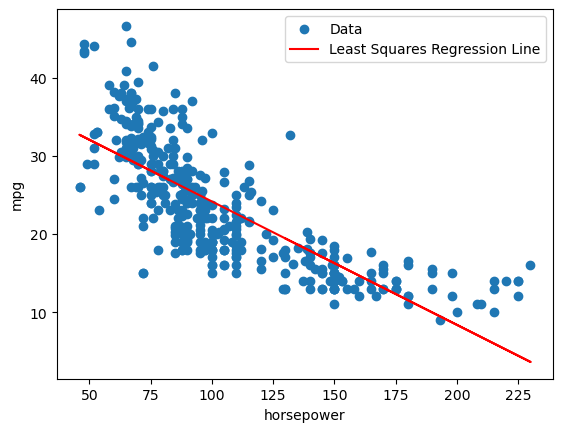

In [119]:
#Add your code here


# Create a new figure and axis
fig, ax = plt.subplots()
predictor_var = 'horsepower'
response_var = 'mpg'
X = Auto[f"{predictor_var}"]   # Predictor variable
y = Auto[f"{response_var}"] # Response variable
# Plot the response and predictor using scatter plot
ax.scatter(X, y, label='Data')

# Plot the least squares regression line
# !! use results.predict, rather than model.predict in statsmodel library
ax.plot(X, results.predict(sm.add_constant(X)), color='red', label='Least Squares Regression Line')

# Add labels and legend
ax.set_xlabel(f"{predictor_var}")
ax.set_ylabel(f"{response_var}")
ax.legend()

# Show the plot
plt.show()

_c)_	Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

Text(0.5, 1.0, 'Residuals vs. Fitted Values')

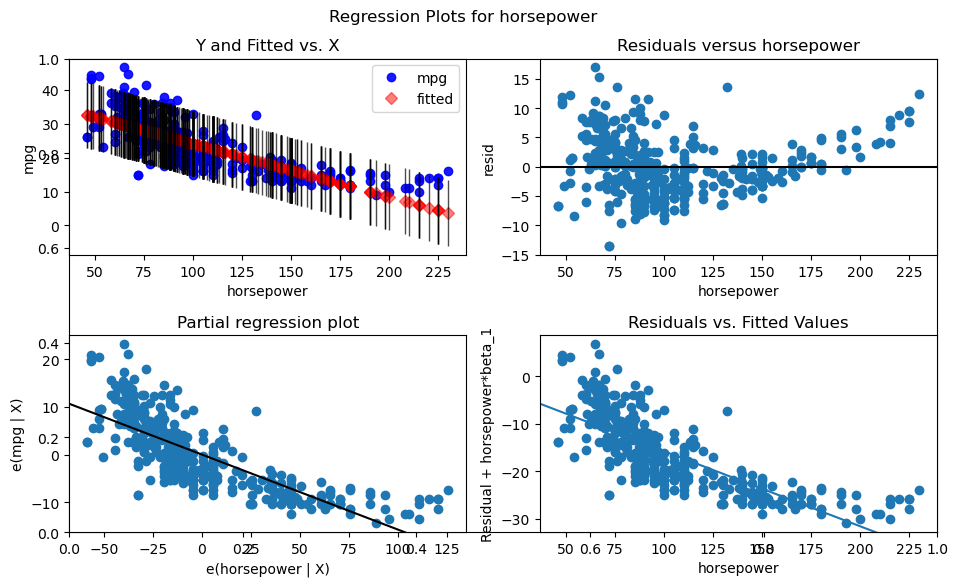

In [130]:
#Add your code here
#Plot at least the Scale-Location Plot, the QQ Plot and the Residuals vs Fitted Values Plot

# Plot 1 - Residuals vs Fitted Values Plot
fig,ax = plt.subplots(1,1, figsize=(10, 6.18))
sm.graphics.plot_regress_exog(results, 'horsepower', fig=fig)
plt.title('Residuals vs. Fitted Values')
# In this plot, the majority of points are clustered closely around the horizonal line, suggesting that the model adequately captures
# the underlying relationship for most data instances.
# However the observation of a funnel shape suggests potential heteroscedasticity in the data.
 

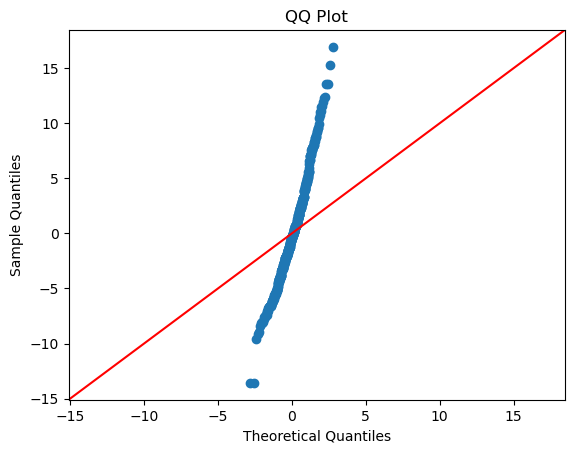

In [131]:
# Plot 2 -  QQ Plot
# Normality of residuals
# Residuals
residuals = results.resid

sm.qqplot(residuals, line='45')
plt.title('QQ Plot')
plt.show()
# The points in the QQ plot have a steeper slope than the reference line (y=X), indicating 
# that the residuals have heavier tails compared to a normal distribution. This deviation suggests
# that extreme values occur more frequently than expected under a normal distribution.

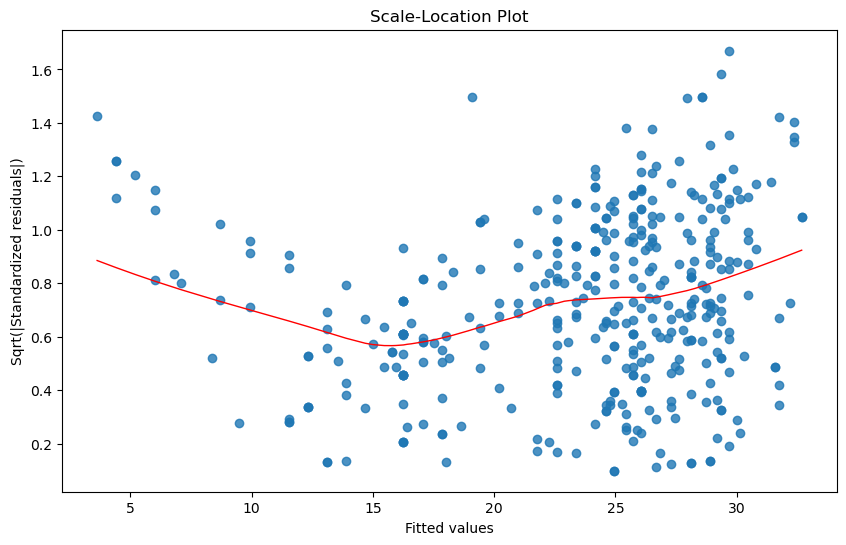

In [170]:
# Plot 3 - Scale Location Plot
# plot the square root of the standardized residuals against the fitted values 
# to check for homoscedasticity.
import seaborn as sns
fitted = results.fittedvalues
std_residuals = np.std(fitted)
# Standardize residuals
standardized_residuals_train = residuals / std_residuals
plt.figure(figsize=(10, 6))
sqrt_standardized_residuals = np.sqrt(np.abs(standardized_residuals_train))
sns.regplot(x=fitted, y=sqrt_standardized_residuals, scatter=True, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Sqrt(|Standardized residuals|)')
plt.title('Scale-Location Plot')
plt.show()

# A curved red line and widely scattered points as fitted values increase in a Scale-Location Plot,
# indicate that the variance of residuals changes across different levels of the predictor variable. 
# This phenomenon, termed heteroscedasticity, undermines the assumption of constant variance in regression analysis.
# Heteroscedasticiy can lead to biased parameter estimates and affects the reliability of the regression model.


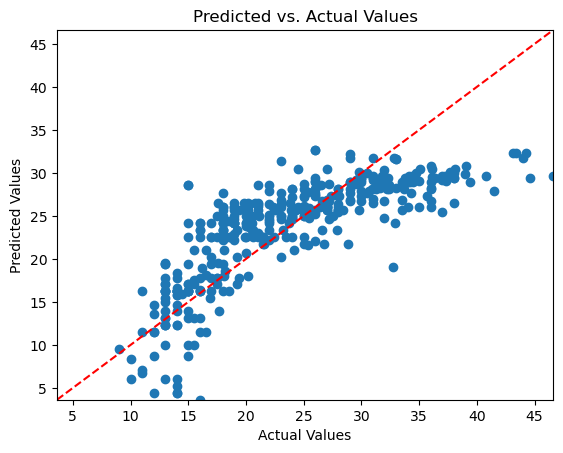

In [135]:
# Plot 4 - Predicted vs. Actual
# different from plot 5 , plot 4 has response actual values as axis
# Define the range for the plot
min_val = min(min(y), min(fitted))
max_val = max(max(y), max(fitted))
# Set the same scale for both axes
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Add a 45-degree line (line of equality)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.scatter(y, fitted)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.show()

# The points are not entirely close to the line of equality (y=X). It suggests that the predicted values do not 
# perfectly match the actual values. This discrepancy indicates that the model may not be accurately predicting the outcomes. 

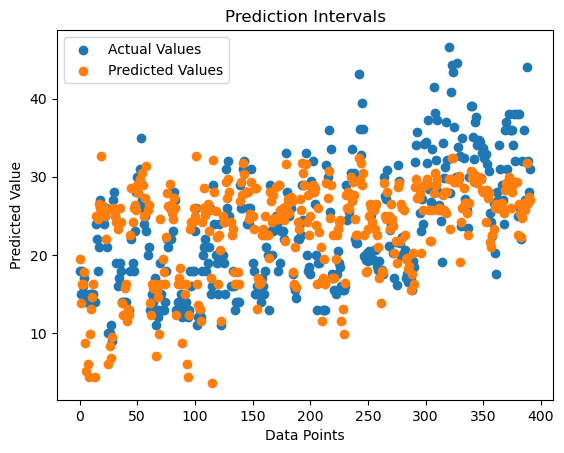

In [169]:
# Plot 5 - Predicted vs. Actual
y_pred = results.fittedvalues
# Plot the actual values
plt.scatter(np.arange(len(X)), y, label='Actual Values')

# Plot the actual values
plt.scatter(np.arange(len(X)), y_pred, label='Predicted Values')

# Add labels and title
plt.xlabel('Data Points') # index for each data point , or index for each row
plt.ylabel('Predicted Value')
plt.title('Prediction Intervals')
plt.legend()
plt.show()

# I See predicted values smaller than actual values for certain ranges of X.
# It indicates issues with the model's fit or with the underlying data.
#1. Model Misspecification: The model may not be capturing the true relationship between the predictors (X) and the response variable (y). This could be due to missing variables, incorrect functional form, or interactions not accounted for in the model.
#2. Outliers or Leverage Points: Extreme outliers or leverage points in the data can disproportionately influence the model fit, leading to discrepancies between predicted and actual values, especially in regions where the data is sparse.
#3. Heteroscedasticity: If the variance of the error terms is not constant across all levels of the predictors, it could lead to biased predictions, especially when the model is fitted to regions with high variability.
#4. Nonlinear Relationships: Linear regression assumes a linear relationship between predictors and the response variable. If the relationship is nonlinear, the model may under- or overestimate the response in certain regions of the predictor space.
#5. Data Transformation: In some cases, transforming the predictors or response variable (e.g., using log transformations) can improve the linearity of the relationship and mitigate discrepancies between predicted and actual values.

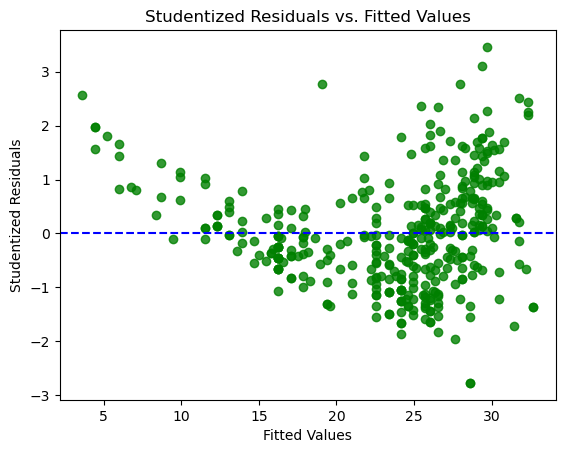

In [172]:
# Plot 6 - Studentized Residuals vs Fitted Values
y_pred = results.fittedvalues
residuals = y - y_pred

# For complex calculation: 
# # Hat matrix
# hat_matrix = np.dot(X, np.linalg.inv(np.dot(X.T, X))).dot(X.T)
# leverage = np.diag(hat_matrix)

# # Calculate the studentized residuals
# std_residuals = np.std(residuals)
# studentized_residuals = residuals / (std_residuals * np.sqrt(1 - leverage))


# Plot Studentized Residuals vs. Fitted Values
plt.scatter(y_pred, results.get_influence().resid_studentized_internal, alpha=0.8, color='green')
plt.axhline(0, color='blue', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Studentized Residuals')
plt.title('Studentized Residuals vs. Fitted Values')
plt.show()

# Observarting a funnel shape in the Studentized Residuals vs. Fitted Values plot indicates that
# potential heteroscedasticity, where the variance of the residuals changes systematically across different 
# levels of the predictor variable (horsepower).

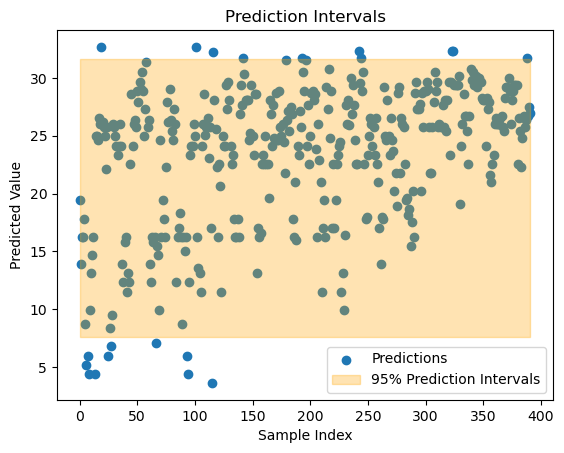

In [167]:
# Plot 7 - Prediction Intervals
num_bootstrap_samples = 1000
confidence = 0.95
# Generate predictions on X
y_pred = results.fittedvalues
# print(y_pred.shape) #(392,)

np.random.seed(0) # sample datasets reproducible

# Compute prediction intervals using bootstrapping
bootstrap_predictions = []
prediction_intervals = []
for _ in range(num_bootstrap_samples):
    # Generate bootstrapped indices within the specified range
    indices = np.random.choice(np.arange(0, len(X)), len(X), replace=True)
    # Generate bootstrapped samples of predictions
    X_bootstrap = X.iloc[indices]
    y_bootstrap = y.iloc[indices]

    # Keep Fitting the regression model and get new ones
    bootstrap_model = sm.OLS(y_bootstrap, sm.add_constant(X_bootstrap))
    bootstrap_results = bootstrap_model.fit()
    predictions_sample = bootstrap_results.predict(sm.add_constant(X_bootstrap))
    bootstrap_predictions.append(predictions_sample)
    
# Compute the bounds of the prediction interval
lower_bound = np.percentile(bootstrap_predictions, (1 - confidence) * 100 / 2)
upper_bound = np.percentile(bootstrap_predictions, (1 + confidence) * 100 / 2)
prediction_intervals = np.column_stack((lower_bound, upper_bound))

# Plot the 'actual' predicted values
plt.scatter(np.arange(len(X)), y_pred, label='Predictions')

# Plot the prediction intervals
plt.fill_between(np.arange(len(X)), prediction_intervals[:, 0], prediction_intervals[:, 1], alpha=0.3, color='orange', label=f'{int(confidence * 100)}% Prediction Intervals')

# Add labels and title
plt.xlabel('Sample Index') # index for each data point , or index for each row
plt.ylabel('Predicted Value')
plt.title('Prediction Intervals')
plt.legend()
plt.show()

# In this plot, most of the points are falling inside the prediction values, while 
# there are some points are outside. This could be due to sevaral reasons:
#1. Extreme Outliers: There might be extreme outliers in your data that are causing the prediction intervals to be wide, leading to some points falling outside the intervals.
#2. Non-Normal Residuals: If the residuals of the model are not normally distributed, the prediction intervals may not accurately capture the variability in the data, leading to points falling outside the intervals.
#3. Model Assumptions Violation: If the assumptions of the linear regression model are violated (e.g., linearity, homoscedasticity, independence of errors), the prediction intervals may not be reliable.
#4. **Small Sample Size: With a small number of bootstrap samples (1000 in this case), the estimation of prediction intervals may not be precise, especially if the underlying distribution of the data is complex.

Additional Practice Questions: 
## How would you describe this exercise in an interview to both a technical and non-technical interviewer?

- 1. Non-technical:

    - "In this exercise, we aimed to understand how a single car attribute, such as horsepower, affects the miles per gallon (MPG) a car can achieve. We used a method called simple linear regression to draw a straight line that best fits the data points, allowing us to make predictions about MPG based on horsepower."

    "We discovered that using just a straight line to model the relationship between horsepower and MPG might not be sufficient. Therefore, we explored more complex models that consider additional attributes or allow for curved relationships."

    - (optional) "We compared two statistical libraries, statsmodels and scikit-learn, to see which model each library would consider the best. Interestingly, statsmodels suggested a model with an exponential relationship and polynomial features of degree 2, while scikit-learn preferred a gradient boosting regressor with polynomial features of degree 4. This shows how different tools can lead to different conclusions."

- 2. Technical:

    - "We applied simple linear regression to examine the relationship between horsepower and MPG in the Auto dataset. The objective was to fit a linear model that minimizes the sum of squared residuals between observed MPG values and those predicted by the model based on horsepower."

    - "However, the simple linear regression model often falls short in capturing the data's complexity. We extended the analysis by incorporating polynomial regression to account for non-linear relationships and explored other machine learning models like gradient boosting to better fit the data. We also considered additional variables such as weight, displacement, and year."

    - "We noticed a divergence between statsmodels and scikit-learn regarding the best model. statsmodels favored a polynomial regression model with degree 2, indicating a non-linear relationship, whereas scikit-learn identified a gradient boosting regressor with polynomial features of degree 4 as the optimal model. This emphasizes the need to evaluate multiple modeling approaches and tools."

## What are the key insights you would want to show?

1. **Model Limitations**:

- Simple Linear Regression: While simple linear regression provides a straightforward approach to modeling the relationship between horsepower and MPG, it often falls short in capturing the true nature of the data due to its inherent linearity. This highlights the need to evaluate the suitability of simple models for more complex datasets.

2. **Exploration of More Complex Models**:

- Polynomial Regression and Machine Learning Models: By incorporating polynomial regression and more advanced machine learning models like Gradient Boosting Regressors, we can better capture non-linear relationships and interactions between variables. These models help in understanding the intricate dependencies within the data.

3. **Tool Discrepancies**:

- Different Library Preferences: Our analysis using both statsmodels and scikit-learn demonstrated that different libraries might suggest different optimal models. For instance, statsmodels favored an exponential regression model with degree 2, whereas scikit-learn identified a Gradient Boosting Regressor with degree 4 as the best model. This emphasizes the importance of using multiple tools and approaches to ensure robust model selection and validation.

4. **Cross-Validation Importance**:

- Ensuring Generalizability: Implementing cross-validation and hyperparameter tuning is crucial for assessing model performance and ensuring that the models generalize well to unseen data. This step is essential to avoid overfitting and to achieve reliable predictive performance in practical applications.


## Can you think of a business context where this exercise would have applications?

**Automotive Industry**: Predicting fuel efficiency (MPG) based on engine specifications can help manufacturers design more efficient engines and market cars effectively based on performance metrics.

**Finance and Marketing**: Understanding the non-linear relationships between advertising spend and sales, or between customer demographics and purchasing behavior, can improve budget allocation and targeted marketing strategies.

**Healthcare**: Modeling the relationship between patient characteristics and health outcomes can enhance predictive analytics for personalized treatment plans.


## Extension --  Handling the problems -- Comparison between Statsmodels and Sk-learn

Using scripts in 3_sm.ipynb and get the metrics for all models from **statsmodels** library, we can get the 'best' model.

- Best model found: Exponential, Degree: 2
- name                                                    Exponential
- model             <class 'statsmodels.genmod.generalized_linear_...
- degree                                                            2
- r2                                                         0.869339
- mse                                                        6.669031
- rmse                                                       2.582447
- mae                                                        1.894875
- residuals_mean                                            -0.457384
- residuals_std                                               2.54162
- variance                                                  56.773259
- bias                                                       1.894875
- complexity                                                       36
- result            <statsmodels.genmod.generalized_linear_model.G...
Name: 20, dtype: object

**Regression Equation from this model**

_mpg = 19.6861*const + 0.6053*cylinders + -0.0307*displacement + -0.0016*horsepower + 0.0006*weight + -0.3780*acceleration + -0.3498*year + -0.7716*origin + -0.0211*cylinders^2 + 0.0003*cylinders displacement + -0.0003*cylinders horsepower + 0.0000*cylinders weight + 0.0107*cylinders acceleration + -0.0097*cylinders year + 0.0304*cylinders origin + -0.0000*displacement^2 + 0.0000*displacement horsepower + 0.0000*displacement weight + -0.0000*displacement acceleration + 0.0003*displacement year + 0.0007*displacement origin + -0.0000*horsepower^2 + -0.0000*horsepower weight + -0.0003*horsepower acceleration + 0.0001*horsepower year + 0.0005*horsepower origin + -0.0000*weight^2 + 0.0000*weight acceleration + -0.0000*weight year + -0.0000*weight origin + 0.0009*acceleration^2 + 0.0037*acceleration year + 0.0170*acceleration origin + 0.0022*year^2 + 0.0039*year origin + 0.0030*origin^2_

**Top features in this dataset "Auto":**

- _['origin' 'cylinders' 'acceleration' 'year' 'displacement' 'cylinders origin' 'cylinders^2' 'acceleration origin' 'cylinders acceleration' 'cylinders year']_

To compare, with the **same settings**, use scripts in 1_sk_learn.ipynb, we can get the metrics for all models from the **sk-learn** library:
- Best model found: Gradient Boosting Regressor (Degree 4)
- 'model': 'Gradient Boosting Regressor (Degree 4)', 
- 'pipeline': Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('regression_model', GradientBoostingRegressor())]), 
- 'degree': 4, 
- 'r2': 0.8942548166194593, 
- 'mse': 5.397295834549319, 'rmse': 2.323208091099314, 
- 'mae': 1.6865944837903424, 
- 'residuals_mean': -0.1265718398068396, 
- 'residuals_std': 2.334580500694688, 
- 'variance': 47.61326074337692, 
- 'bias': 1.6865944837903424, 
- 'complexity': 0.0001

**Regression Equation from this model**
_as the degree is 4, the equation is very lengthy, only quote a part from it:_
_(No intercept for this model, as include_bias is set to be False.)_
_mpg = 0.00 + 0.29 * displacement + 0.28 * weight + 0.14 * year + 0.14 * cylinders + 0.12 * horsepower + 0.09 * displacement^2 + 0.08 * displacement weight + 0.08 ...._

**Top features in the dataset "Auto"**
- _['displacement' 'weight' 'year' 'cylinders' 'horsepower' 'displacement^2'
 'displacement weight' 'weight^2' 'displacement year'
 'cylinders displacement']_




Next is to compare both of the above models using visuals 

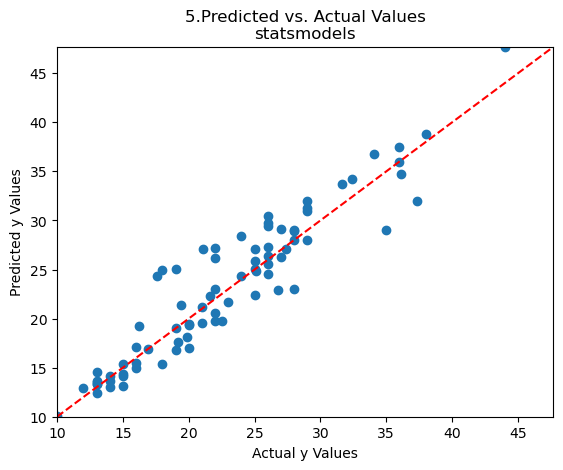   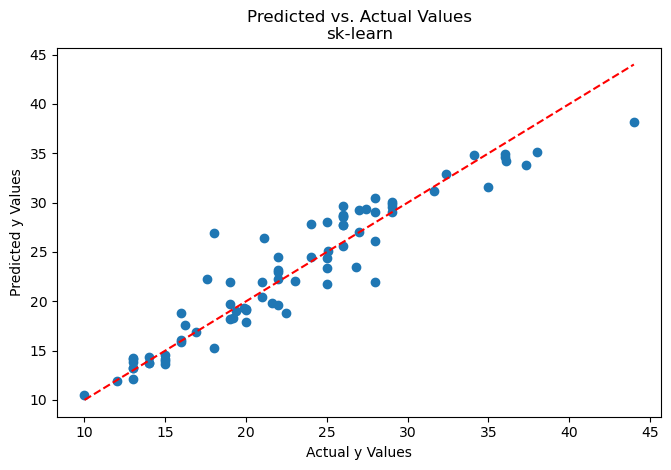 

**Predicted y (mpg) values vs. Acutual y values** Most points are close to the line y=x in the plots, it suggests that the predicted values are similar to the actual values, indicating that the model's predictions are accurate. This alignment with the line y=x means that the model's predictions match the true values, indicating good performance. However, deviations from the line y=x could indicate areas where the model performs less accurately. It's essential to examine these deviations to understand where the model may need improvement.

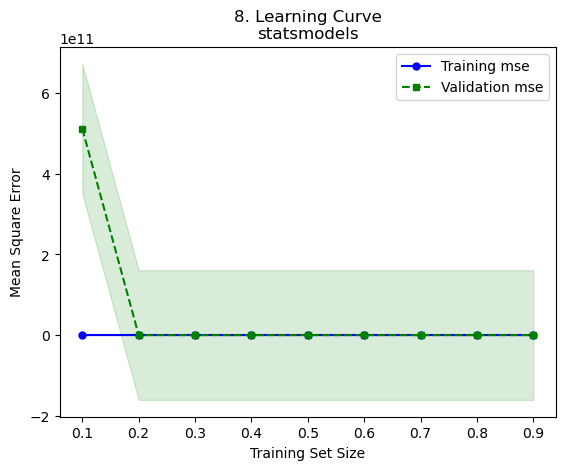     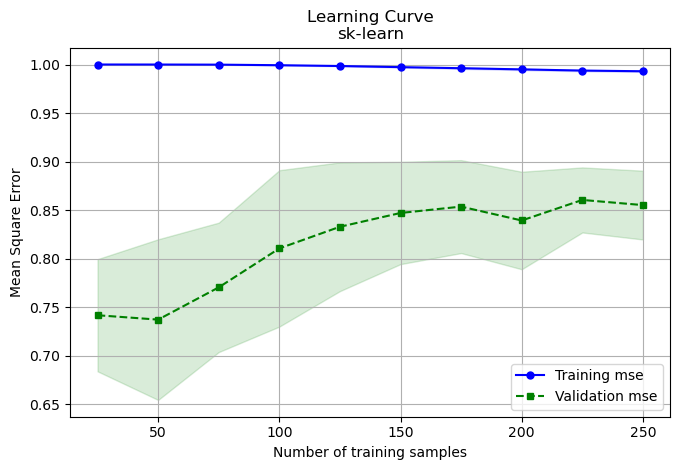

**Learning Curve (statsmodels)** A learning curve showing a sharp decrease to MSE = 0 for both training and validation MSE suggests that the model is overfitting the data.
- Too High Polynomial Degree: If the degree of the polynomial features is too high, the model might perfectly fit the training data, capturing noise as if it were a real signal.
- Overfitting: This typically indicates that the model is overly complex and fits the training data too well, including noise, leading to a perfect fit.
- Small Dataset: If the dataset is very small, it's easier for a complex model to fit the data perfectly.
- Regularization: Lack of regularization can lead to overfitting, where the model fits the training data too closely.

**Learning Curve (sk-learn)** The training accuracy is nearly 1 (or 100%) throughout the learning process while the validation accuracy gradually increases, it indicates that the model is performing exceptionally well on the training data but initially less well on the validation data. Over time, as the model trains further, its performance on the validation data improves. 

- Overfitting and then improvement: The model might initially overfit the training data, capturing noise and specific patterns that don't generalize well. As training continues, the model might learn more generalizable patterns, leading to an improvement in validation accuracy.

- Complex model: A very complex model (e.g., deep neural networks) might take longer to generalize well to unseen data. It starts by memorizing the training data (hence the high training accuracy) and then gradually learns to generalize.



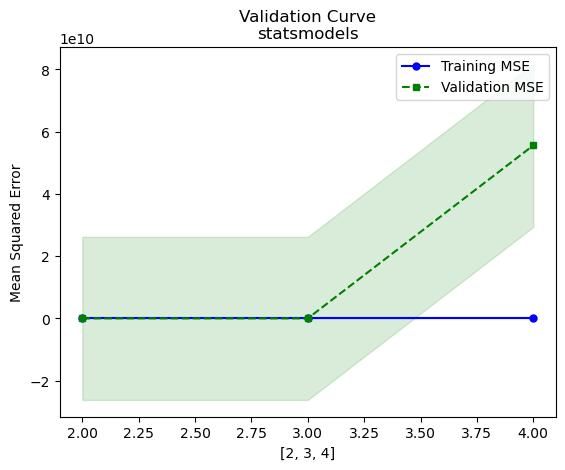   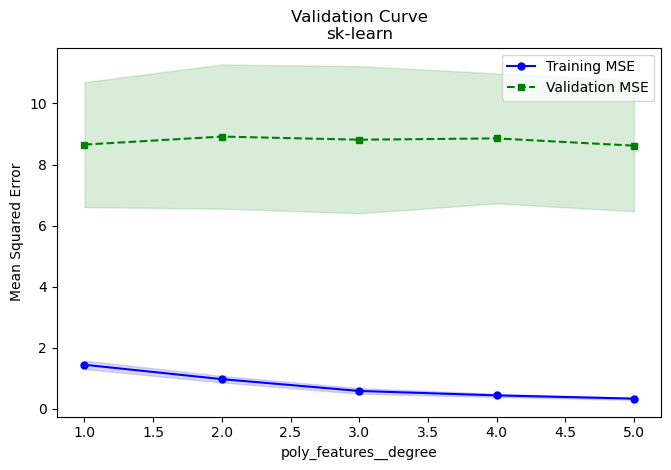

**Validation Curve(statsmodels)** A sharp rise in the mean squared error (MSE) on the validation set after a certain degree (in this case, degree = 3) in the validation curve typically indicates overfitting.
- Training MSE: As the degree of the polynomial increases, the model becomes more flexible and can fit the training data more closely. This usually leads to a decrease in the training MSE.
- Validation MSE: Initially, as the model becomes more flexible (increasing the polynomial degree), the validation MSE might decrease as the model starts capturing more complex patterns in the data. However, beyond a certain point, the model starts overfitting to the training data, capturing noise and spurious patterns that do not generalize well to unseen data. This results in an increase in the validation MSE.

**Validation Curve(sk-learn)** We observe a validation curve where the training MSE slowly decreases to 0, while the validation MSE remains high and relatively flat, it typically indicates that the model is overfitting the training data but failing to generalize well to unseen data.
- Simplify the Model: Reduce the complexity of the model (e.g., lower the degree of the polynomial).
Use fewer features or perform feature selection to reduce the risk of overfitting.
- Regularization: Apply regularization techniques such as Ridge Regression (L2 regularization) or Lasso Regression (L1 regularization). Regularization adds a penalty to the model's complexity, discouraging it from fitting the noise in the training data.
- More Data: Collect more training data if possible. More data can help the model generalize better by providing more examples of the underlying patterns.
- Cross-validation: Use cross-validation to ensure that the model's performance is robust across different subsets of the data.

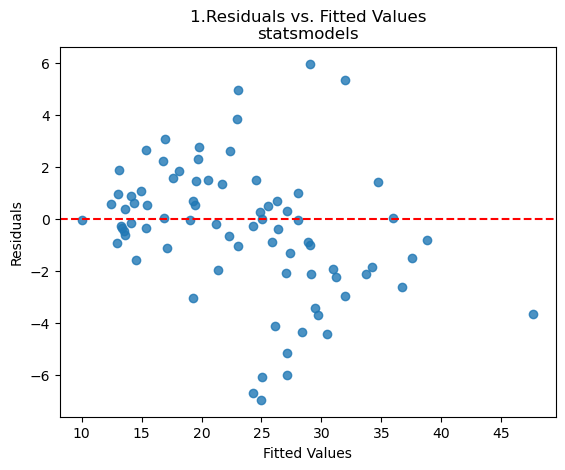    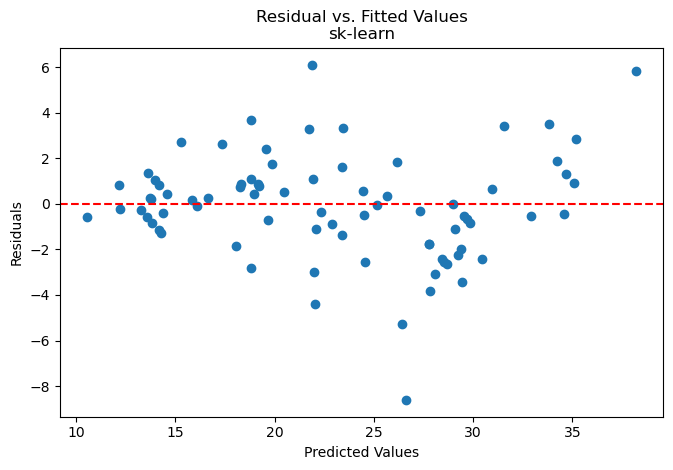    

**Residuals vs. Fitted Values** Both models are polynomial regression models and we're observing a funnel shape in the residuals vs fitted values plot, it's important to address the heteroscedasticity as it may indicate that the variance of the residuals is increasing with the fitted values.

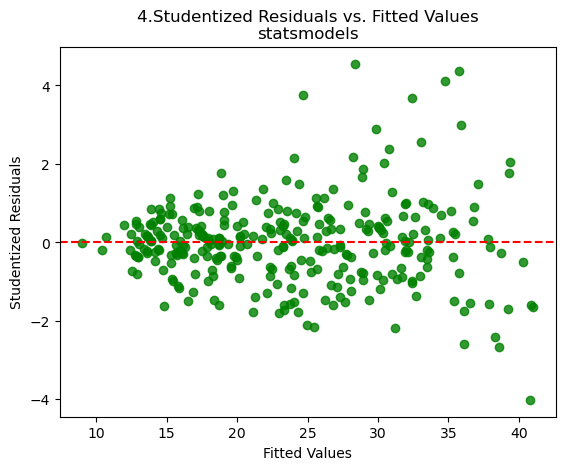    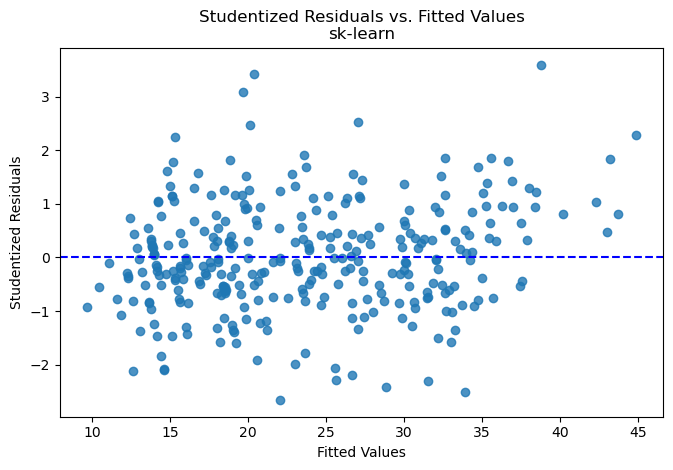

**Studentized Residuals vs. Fitted Values** The presence of a funnel shape in the studentized vs. fitted plot suggests heteroscedasticity, where the variance of the residuals increases as the fitted values increase. This can affect the reliability of the model's predictions and the interpretation of the coefficients.

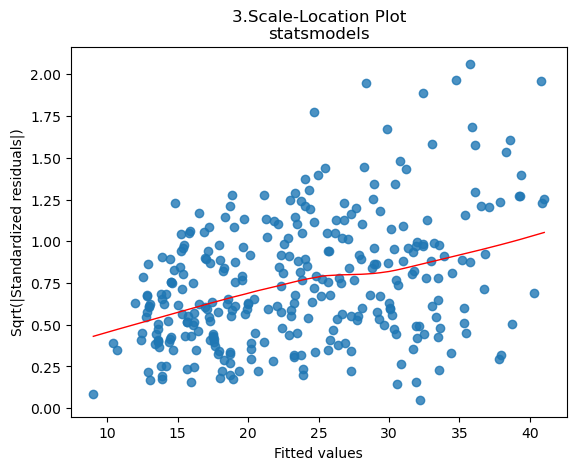    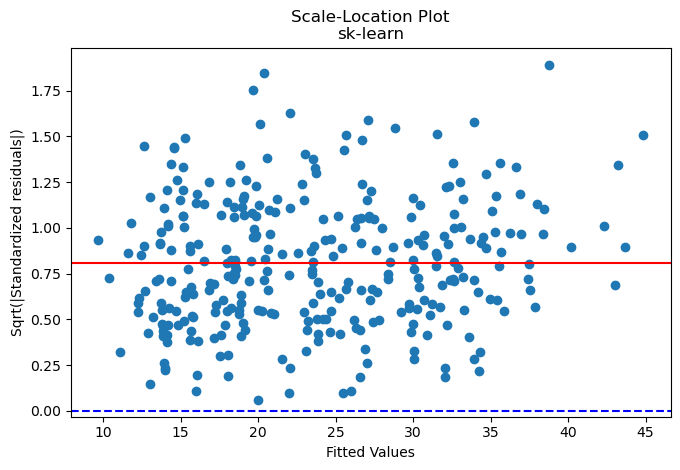

In the **scale-location** plot for the statsmodels model, the red line representing the mean of the standardized residuals might have a slope. This could indicate that the variance of residuals is not constant across the range of fitted values. In contrast, the scale-location plot for the sklearn model might have a red line that is parallel to the horizontal axis (y=0), indicating that the variance of residuals is relatively constant across different levels of fitted values.


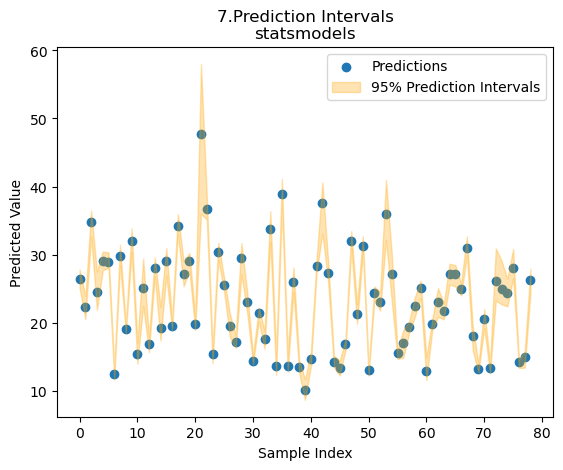    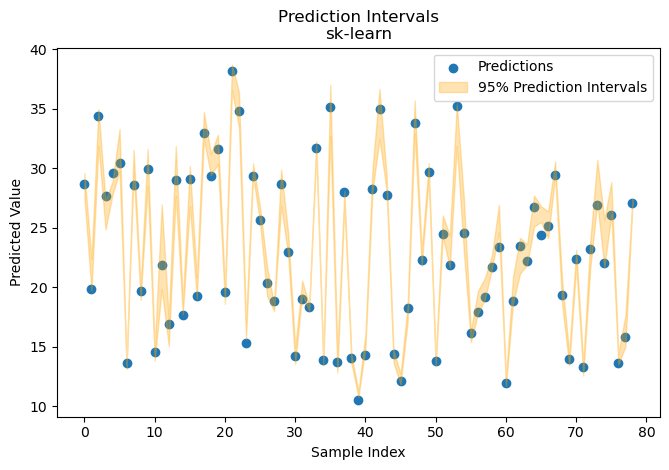

**Prediction Intervals** Both models are able to capture the variation in the data reasonably well and provide predictions that fall within a certain range around the observed values. 

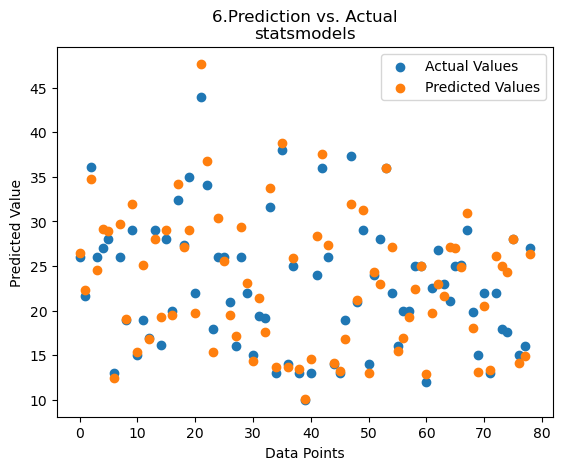    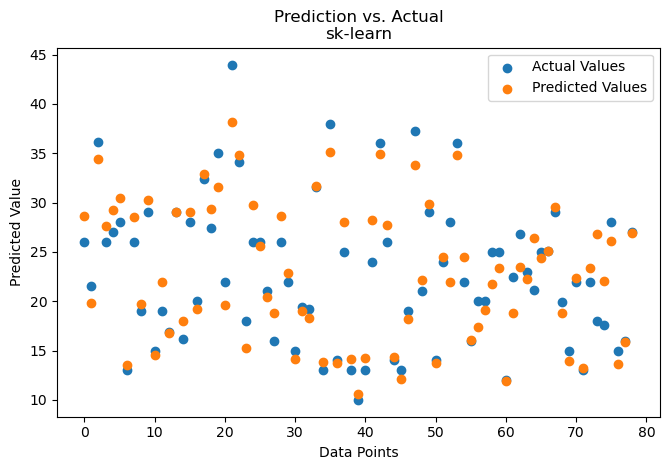

**Prediction vs. Actual** Having predicted values close to actual values indicates that both models are performing well and capturing the underlying patterns in the data effectively. We are also seeing outliers in both the fitted values and the actual values plots, it suggests that these outliers are impacting both the model's predictions and the observed data. This situation can occur due to various reasons, such as data entry errors, measurement noise, or genuine anomalies in the data.

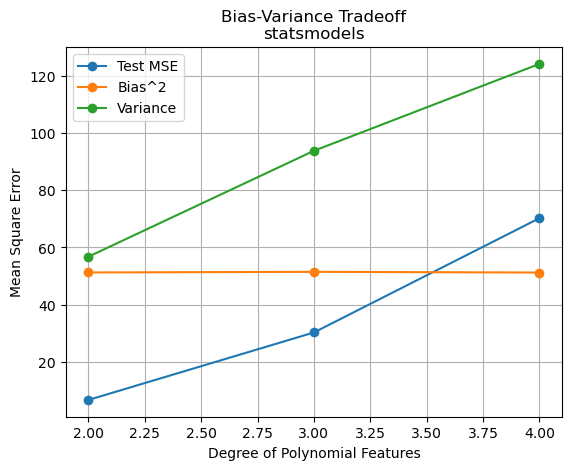    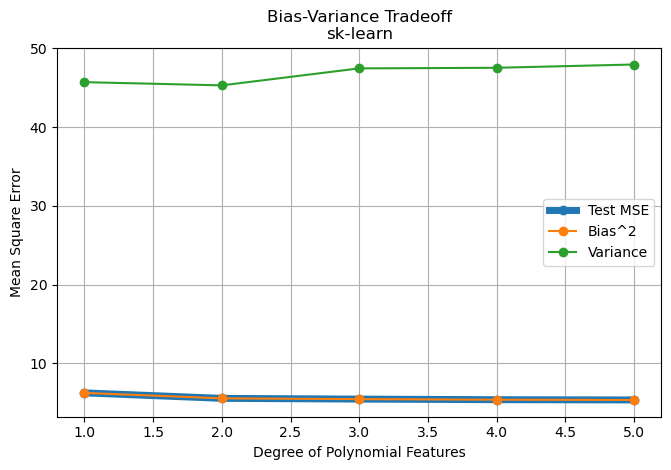

**Bias-variance Tradeoff(statsmodels)** This plot is a common occurrence when analyzing the bias-variance tradeoff in polynomial regression models.

- Degree = 2: At this degree, the model strikes a good balance between bias and variance. It captures enough complexity from the data without overfitting. Consequently, both the bias and variance are minimized, leading to a lower overall test MSE.
- Increasing Degree: As the degree increases beyond 2, the model becomes increasingly complex. This can lead to overfitting, where the model starts capturing noise in the training data, resulting in higher variance. Consequently, the test MSE increases due to the model's decreased ability to generalize to unseen data.
- Degree Selection: In practical scenarios, it's essential to select the degree that minimizes the test MSE while balancing bias and variance. This is often achieved through techniques like cross-validation or validation curves, which help in selecting the optimal model complexity.

**Bias-variance Tradeoff(sk-learn)** We're observing that the curves for MSE and Bias^2 are overlapping or appearing similar, it might indicate that their values are close to each other across different degrees of polynomial features. This behavior suggests that the model's performance, as measured by MSE, is influenced by both bias and variance.
- Evaluate Model Complexity: Assess if the model complexity is appropriate for the given dataset. If the model is too simple, it might underfit the data, leading to high bias. Conversely, if the model is too complex, it might overfit the data, leading to high variance.

- Adjust Regularization: If you're using a regularized model (e.g., Ridge or Lasso regression), you can adjust the regularization strength to control the bias-variance tradeoff. Increasing the regularization strength tends to decrease variance at the cost of slightly increasing bias.

- Explore Different Models: Consider trying different types of models or ensemble methods that might better capture the underlying patterns in the data.

- Feature Selection: If you're using polynomial features, you can explore different feature selection techniques to include only the most relevant features and reduce the model's complexity.

- Cross-Validation: Ensure that you're performing cross-validation properly to obtain reliable estimates of bias and variance. Adjust the number of folds or the cross-validation strategy if necessary.